<a href="https://colab.research.google.com/github/Renzou1/treinamento-h2ia/blob/main/04_alg_genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da mochila usando Busca Tabu
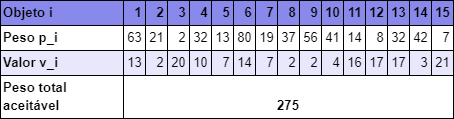

In [80]:
import numpy as np
import random

In [81]:
def flip(list, index):
  if(list[index] == 0):
    list[index] = 1
  else:
    list[index] = 0

In [161]:
size = 15
max_weight = 275
id = np.arange(1, size)
weights = np.array([63, 21, 2, 32, 13, 80, 19, 37, 56, 41, 14, 8, 32, 42, 7])
values = np.array([13, 2, 20, 10, 7, 14, 7, 2, 2, 4, 16, 17, 17, 3 ,21])

class Cromossome:
  def __init__(self, genes):
    self.genes = genes
    self.npgenes = np.array(genes)
    self.fitness = self.calculateFitness()
    self.weight = self.calculateWeight()
    self.length = len(genes)

  def calculateWeight(self):
    sum = 0
    for item in np.arange(1, len(self.genes)):
       sum = sum + self.genes[item] * weights[item]
    return sum

  def calculateFitness(self):
    if(self.calculateWeight() > 275):
      return 0
    sum = 0
    for item in np.arange(1, len(self.genes)):
     sum = sum + self.genes[item] * values[item]
    return sum


In [92]:
def create_population(size):
  population = []
  for i in range(size):
    genes = []
    for k in range(15):
      genes.append(random.randint(0,1))
    population.append(Cromossome(genes))

  return population

In [195]:
def crossover(crom1, crom2):
  x = random.randint(1,crom1.length - 1)

  genes3 = np.concatenate((crom1.npgenes[:x], crom2.npgenes[x:]))
  y = random.randint(0,200)
  if y == 1:
    flip(genes3, random.randint(0, crom1.length - 1))
  genes4 = np.concatenate((crom2.npgenes[:x], crom1.npgenes[x:]))
  if y == 2:
    flip(genes4, random.randint(0, crom1.length - 1))

  crom3 = Cromossome(genes3)
  crom4 = Cromossome(genes4)

  return crom3, crom4

In [167]:
def reproduction(population, popSize):
  half = (popSize)//2
  parents = population[:half]
  newPopulation = []

  for i in range(half):
    father = random.randint(0, half - 1)
    mother = random.randint(0, half - 1)
    child1, child2 = crossover(parents[father], parents[mother])
    newPopulation.append(child1) #children in later half, dont get picked
    newPopulation.append(child2)

  return newPopulation

In [205]:
N = 500

def evolution(N, iterations=2000):

  population = create_population(N)
  population.sort(key=lambda x: x.fitness, reverse=True)

  iterations = 0
  bestIteration = 0
  bestSolution = population[0].genes
  finalWeight = population[0].weight
  bestFitness = population[0].fitness

  for x in range(N):
    iterations = iterations + 1

    population = reproduction(population, N)
    if(population[0].fitness > bestFitness):
      bestSolution = population[0].genes
      finalWeight = population[0].weight
      bestFitness = population[0].fitness
      bestIteration = iterations

  # implementar mutação, seleção e avaliação

  print("best solution:", bestSolution)
  print("best fitness:", bestFitness)
  print("best iteration:", bestIteration)
  print("final weight:", finalWeight)

evolution(N)

best solution: [1 0 1 1 1 1 0 1 0 1 1 1 1 0 1]
best fitness: 128
best iteration: 133
final weight: 266
